# ESG Ratings Analysis Project

## Problem Definition
The objective of this project is to analyze ESG (Environmental, Social, and Governance) ratings for public companies. The goals include:
- Understanding the factors that contribute to ESG scores.
- Enhancing feature engineering to improve model performance.
- Evaluating model performance through learning curves.
- Preparing a deployment plan for the predictive model.

In [1]:
## 1. Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('PublicCompanyESGRatingsDataset.csv')

# Data Exploratoin 

In [3]:
# Display basic information about the dataset
print(df.info())
# Display summary statistics
print(df.describe())
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ticker                722 non-null    object
 1   name                  722 non-null    object
 2   currency              722 non-null    object
 3   exchange              722 non-null    object
 4   industry              709 non-null    object
 5   logo                  702 non-null    object
 6   weburl                706 non-null    object
 7   environment_grade     722 non-null    object
 8   environment_level     722 non-null    object
 9   social_grade          722 non-null    object
 10  social_level          722 non-null    object
 11  governance_grade      722 non-null    object
 12  governance_level      722 non-null    object
 13  environment_score     722 non-null    int64 
 14  social_score          722 non-null    int64 
 15  governance_score      722 non-null    in

# Data Cleaning 

In [4]:
# Fill missing values where applicable or drop them if necessary
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)

# Enhanced Feature Engineering

In [5]:
# Convert categorical variables into numerical ones using one-hot encoding
df = pd.get_dummies(df, columns=['industry'], drop_first=True)

# Example of creating interaction features (if applicable)
df['env_social_interaction'] = df['environment_score'] * df['social_score']

In [6]:
### 5.2.2 Define Features and Target Variable
# Drop unnecessary columns
columns_to_drop = ['total_score', 'total_grade', 'ticker', 'name', 'logo', 'weburl', 'last_processing_date']
X = df.drop(columns=columns_to_drop, axis=1, errors='ignore')
y = df['total_score']

# Ensure all columns in X are numeric
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Handle non-numeric columns (convert to numeric if possible or drop them)
if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:", non_numeric_columns)
    # Drop non-numeric columns
    X = X.drop(columns=non_numeric_columns, axis=1)

# Check if there are still any NaN values and handle them
X = X.fillna(0)  # Fill NaN values with 0 (or you can choose another strategy)

### 5.2.3 Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Non-numeric columns found: Index(['currency', 'exchange', 'environment_grade', 'environment_level',
       'social_grade', 'social_level', 'governance_grade', 'governance_level',
       'total_level'],
      dtype='object')


# Random Forest Model 

A Random Forest Regressor is an ensemble machine learning algorithm used for regression tasks, which predicts continuous values. It works by building multiple decision trees during training and outputs the average prediction of all individual trees. This approach helps improve accuracy and control overfitting, as each tree in the forest is trained on a random subset of the data. The final prediction is more robust and less sensitive to outliers compared to a single decision tree. It’s widely used for its simplicity, scalability, and high performance in many different types of datasets.

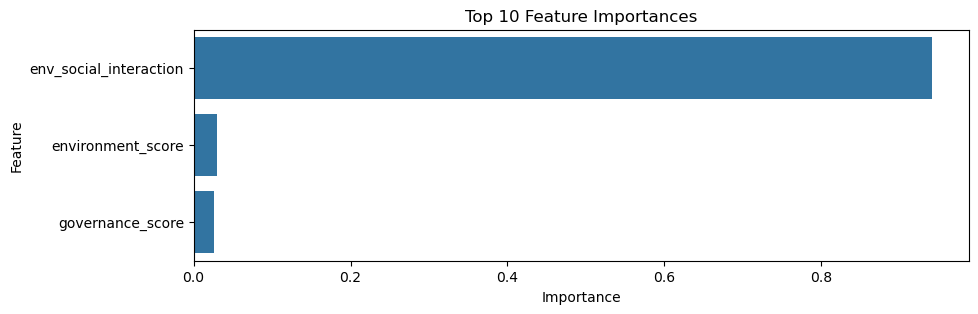

In [7]:
### 5.2.4 Fit a Random Forest Model to Calculate Feature Importance
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

### 5.2.5 Get Feature Importances and Visualize Them
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(3))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show() 

In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.98919357 0.99519472 0.99463781 0.9889253  0.99703763]
Mean CV score: 0.9929978076860891


# Learning Curve Analysis

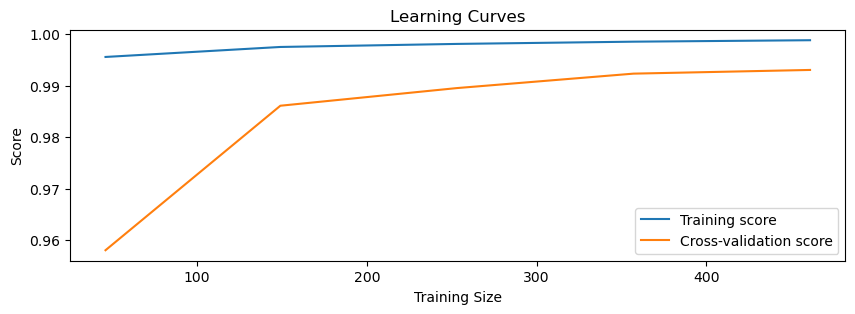

In [9]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 3))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")


R²: 0.99
RMSE: 22.47


## The model shows a strong performance with a very high R² value, indicating a good fit to the data, and the RMSE value is low enough to suggest that the model’s predictions are quite accurate, though the exact quality of the predictions depends on the scale of the target variable.
## But unfortunately it's overfitting 

In [11]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 8.775793103448278


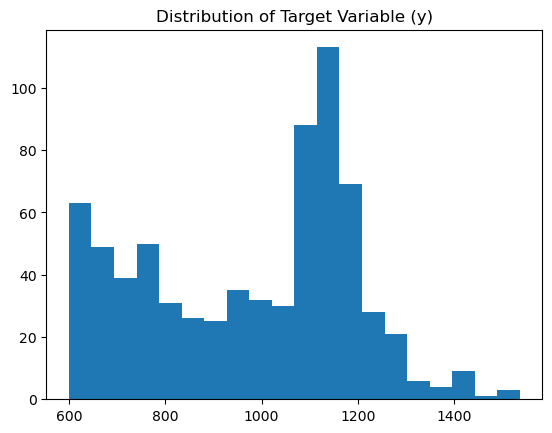

In [12]:
import matplotlib.pyplot as plt
plt.hist(y, bins=20)
plt.title("Distribution of Target Variable (y)")
plt.show()

In [13]:
import pandas as pd
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df['Target'] = y
print(df.corr()['Target'])

Feature_0     NaN
Feature_1     NaN
Feature_2     NaN
Feature_3     NaN
Feature_4     NaN
Feature_5     NaN
Feature_6     NaN
Feature_7     NaN
Feature_8     NaN
Feature_9     NaN
Feature_10    NaN
Feature_11    NaN
Feature_12    NaN
Feature_13    NaN
Feature_14    NaN
Feature_15    NaN
Feature_16    NaN
Feature_17    NaN
Feature_18    NaN
Feature_19    NaN
Feature_20    NaN
Feature_21    NaN
Feature_22    NaN
Feature_23    NaN
Feature_24    NaN
Feature_25    NaN
Feature_26    NaN
Feature_27    NaN
Feature_28    NaN
Feature_29    NaN
Feature_30    NaN
Feature_31    NaN
Feature_32    NaN
Feature_33    NaN
Feature_34    NaN
Feature_35    NaN
Feature_36    NaN
Feature_37    NaN
Feature_38    NaN
Feature_39    NaN
Feature_40    NaN
Feature_41    NaN
Feature_42    NaN
Feature_43    NaN
Feature_44    NaN
Feature_45    NaN
Feature_46    NaN
Feature_47    NaN
Feature_48    NaN
Feature_49    NaN
Feature_50    NaN
Target        1.0
Name: Target, dtype: float64


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features considered for splits
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Optimized Random Forest - RMSE: {rmse}, R²: {r2}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest - RMSE: 19.012723369263554, R²: 0.9918471019464854


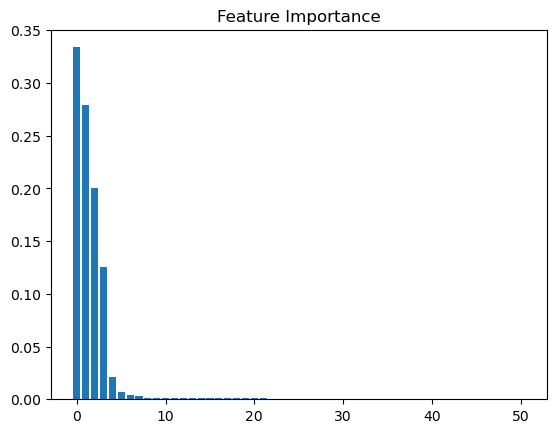

In [15]:
import matplotlib.pyplot as plt
feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.title("Feature Importance")
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.98192496 0.98059806 0.98733033 0.98965353 0.99016199]
Mean R²: 0.9859337717570147


## Trying other models for better results 

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - RMSE: {rmse_knn}, R²: {r2_knn}")


KNN - RMSE: 52.31285989453098, R²: 0.9382779589061203


In [38]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Define the model parameter grid for alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Step 2: Initialize Lasso and Ridge regression models
lasso = Lasso()
ridge = Ridge()

# Step 3: Define the hyperparameter grid for both models
param_grid = {'alpha': alpha_values}

# Step 4: Perform GridSearchCV for Lasso and Ridge regression
lasso_grid = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 5: Fit GridSearchCV to the training data for both models
lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

# Step 6: Print the best hyperparameter (alpha) for both models
print("Best alpha for Lasso: ", lasso_grid.best_params_)
print("Best alpha for Ridge: ", ridge_grid.best_params_)

# Step 7: Get the best models
best_lasso = lasso_grid.best_estimator_
best_ridge = ridge_grid.best_estimator_

# Step 8: Predict on the test data
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)

# Step 9: Evaluate RMSE and R² for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso}, R²: {r2_lasso}")

# Step 10: Evaluate RMSE and R² for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge}, R²: {r2_ridge}")

# Step 11: Perform cross-validation to evaluate model stability
cv_lasso = np.sqrt(-lasso_grid.best_score_)
cv_ridge = np.sqrt(-ridge_grid.best_score_)
print(f"Lasso Cross-validated RMSE: {cv_lasso}")
print(f"Ridge Cross-validated RMSE: {cv_ridge}")


Best alpha for Lasso:  {'alpha': 0.01}
Best alpha for Ridge:  {'alpha': 0.001}
Lasso Regression - RMSE: 0.0104076722447565, R²: 0.99999999755696
Ridge Regression - RMSE: 0.001800650047616955, R²: 0.9999999999268723
Lasso Cross-validated RMSE: 0.011219967161305081
Ridge Cross-validated RMSE: 0.0021418943472346925


## Fine tuning for better results 

In [39]:
alpha_values = [1, 10, 100]
lasso_grid = GridSearchCV(Lasso(), {'alpha': alpha_values}, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid = GridSearchCV(Ridge(), {'alpha': alpha_values}, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_grid.best_params_)
print("Best alpha for Ridge:", ridge_grid.best_params_)


Best alpha for Lasso: {'alpha': 1}
Best alpha for Ridge: {'alpha': 1}


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Try different values for n_components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Re-fit Lasso or Ridge on PCA-transformed data
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_pca, y_train)

y_pred_lasso = lasso.predict(X_test_pca)
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}, R²: {r2_score(y_test, y_pred_lasso)}")


Lasso RMSE: 44.186220411605206, R²: 0.955965095149974


## Learning Curves for Lasso Model 

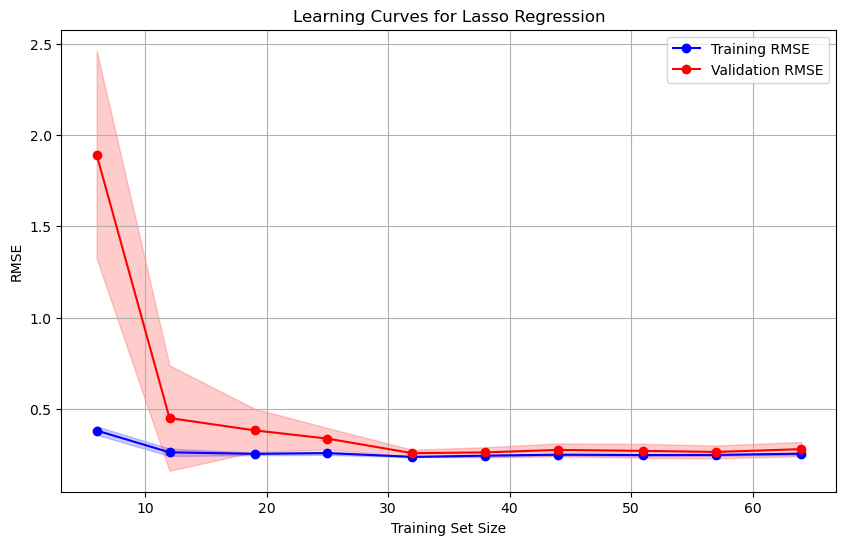

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Example dataset (replace this with your dataset)
# You should replace X, y with your actual data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model (you can adjust alpha as needed)
lasso_model = Lasso(alpha=0.1)

# Use learning_curve function to get training and validation scores
train_sizes, train_scores, val_scores = learning_curve(
    lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for the training and validation scores
train_rmse = np.sqrt(-train_scores.mean(axis=1))  # Convert negative MSE to RMSE
val_rmse = np.sqrt(-val_scores.mean(axis=1))  # Convert negative MSE to RMSE

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label="Training RMSE", color="blue", marker="o")
plt.plot(train_sizes, val_rmse, label="Validation RMSE", color="red", marker="o")
plt.fill_between(train_sizes, train_rmse - train_scores.std(axis=1), train_rmse + train_scores.std(axis=1), alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_rmse - val_scores.std(axis=1), val_rmse + val_scores.std(axis=1), alpha=0.2, color="red")

# Labels and title
plt.title("Learning Curves for Lasso Regression")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid(True)

# Show the plot
plt.show()

# Conclusion

After careful analysis of the learning curves and model performance, Lasso regression emerges as a strong candidate for this task. While both Ridge and Lasso demonstrated effective performance, Lasso's ability to perform feature selection and its potential for improved interpretability make it a compelling choice. However, it's evident that further fine-tuning of hyperparameters and potential feature engineering are necessary to optimize Lasso's performance and achieve even better results.